# libraries needed

In [1]:
# libraries needed
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis


#model selection
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    ConfusionMatrixDisplay
)


import warnings
warnings.filterwarnings('ignore')
# Increase columns output
pd.set_option('display.max_columns', 100, 'display.width', 180)

# read data

In [2]:

labeled_df = pd.read_csv("bdhsc_2024\\stage1_labeled\\0_0.csv")
labeled_df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,4951,4952,4953,4954,4955,4956,4957,4958,4959,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,-0.000009,0.000006,0.000019,0.00002,0.00001,-0.000006,-0.000014,-0.000009,-6.866560e-07,-0.000003,-0.000013,-0.000015,-0.000006,8.392462e-07,-0.000006,-0.000016,-0.000018,-0.000012,-0.000007,3.814756e-07,0.000014,0.000027,0.000031,0.000026,0.00002,0.000024,0.000037,0.000044,0.000035,0.00002,0.00002,0.000037,0.000051,0.00005,0.000041,0.000035,0.000033,0.000033,0.000034,0.000033,0.000027,0.000016,0.000014,0.000031,0.000058,0.000068,0.000052,0.000029,0.000021,0.000027,...,-0.00001,-0.000012,-0.000007,0.000008,0.00002,0.000015,-2.288853e-07,-0.000012,-0.000014,-0.000002,0.00002,0.000042,0.000051,0.000039,0.000014,-7.629511e-08,0.000011,0.000032,0.000033,0.00001,-0.000009,-0.000003,0.000019,0.000032,0.000024,0.000003,-0.000009,-0.000006,-0.000001,-0.00001,-0.000023,-0.000023,-0.000018,-0.000021,-0.000025,-0.000011,0.000016,0.000027,0.000008,-0.000027,-0.000053,-0.000066,-0.000077,-0.000091,-0.000092,-0.000068,-0.000033,-0.000011,0.000007,2


# eda

### timeseries plot of the sleepstages

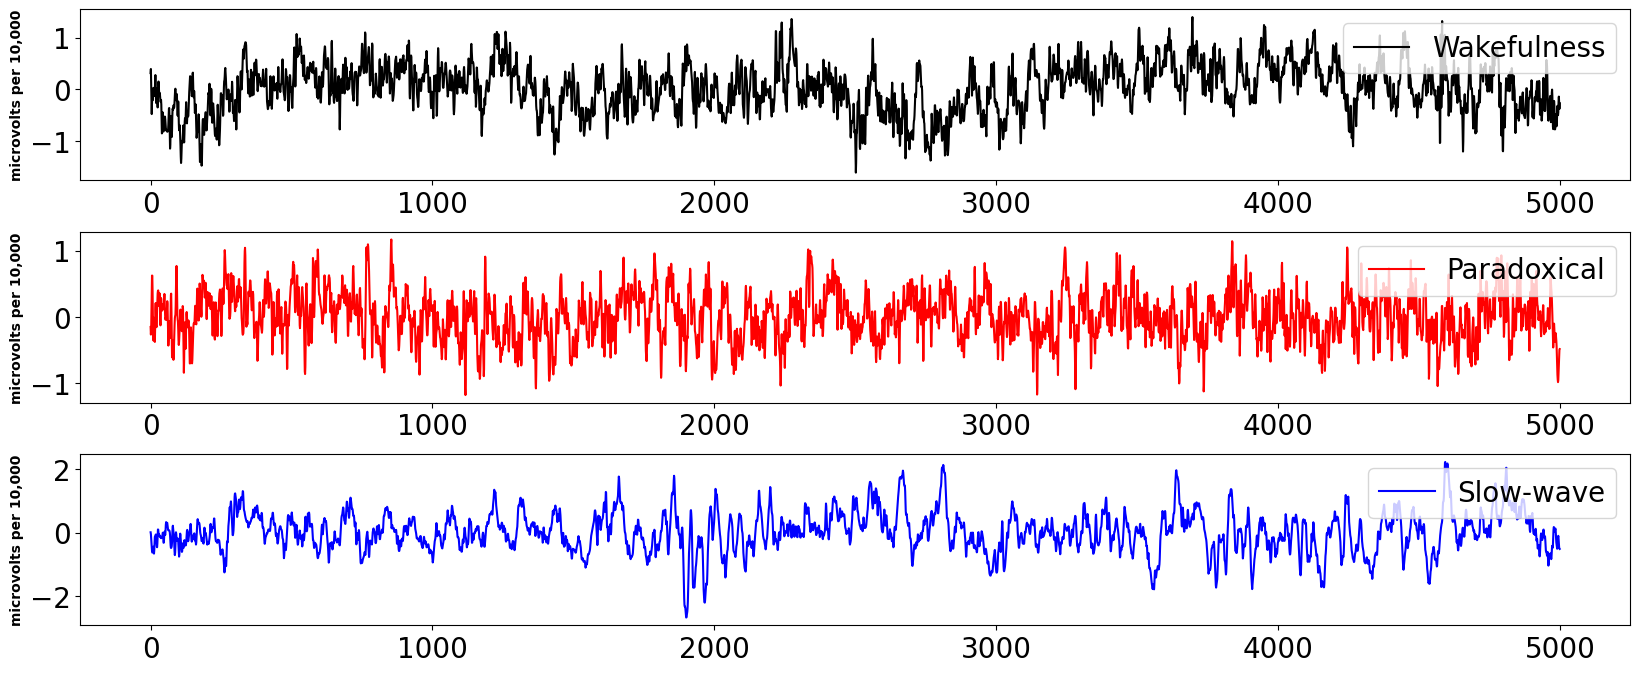

In [3]:
#Wakefulness
fig, axs = plt.subplots(nrows = 3, ncols =1, figsize=(20, 8), gridspec_kw={'hspace': 0.3})
axs[0].plot(labeled_df.loc[labeled_df["5000"] == 2].iloc[1,:-1].values*10000, color ='black')
axs[0].legend(["Wakefulness"],loc="upper right", fontsize=20)
axs[0].set_ylabel("microvolts per 10,000", fontweight='bold')
axs[0].tick_params(axis='x', labelsize=20)
axs[0].tick_params(axis='y', labelsize=20)
# Paradoxical sleep
axs[1].plot(labeled_df.loc[labeled_df["5000"] == 0].iloc[1,:-1].values*10000, color ='red')
axs[1].legend(["Paradoxical"], loc="upper right", fontsize=20)
axs[1].set_ylabel("microvolts per 10,000", fontweight='bold')
axs[1].tick_params(axis='x', labelsize=20)
axs[1].tick_params(axis='y', labelsize=20)
# Slow-wave sleep
axs[2].plot(labeled_df.loc[labeled_df["5000"] == 1].iloc[1,:-1].values*10000, color ='b')
axs[2].legend(["Slow-wave"],loc="upper right", fontsize=20)
axs[2].set_ylabel("microvolts per 10,000", fontweight='bold')
axs[2].tick_params(axis='x', labelsize=20)
axs[2].tick_params(axis='y', labelsize=20)
plt.show()

### Distribution of the Sleepstages

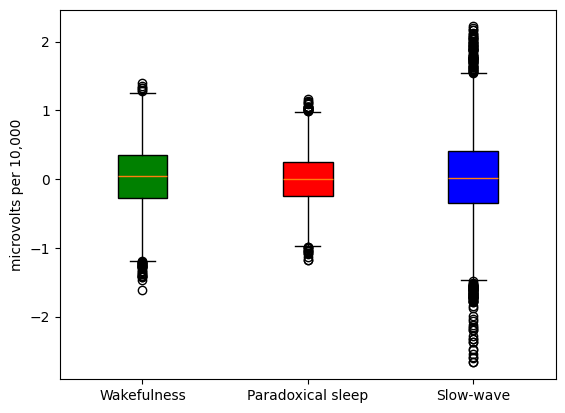

In [4]:
arr1 = labeled_df.loc[labeled_df["5000"] == 2].iloc[1,:-1].values*10000
arr2 = labeled_df.loc[labeled_df["5000"] == 0].iloc[1,:-1].values*10000
arr3 = labeled_df.loc[labeled_df["5000"] == 1].iloc[1,:-1].values*10000


labels = ['Wakefulness','Paradoxical sleep','Slow-wave']
colors =  ['g', 'r', 'b']

df2 = [arr1,arr2,arr3]
fig, ax = plt.subplots()
ax.set_ylabel('microvolts per 10,000')

bplot = ax.boxplot(df2,
                   patch_artist=True)  # fill with color
ax.set_xticklabels(labels)

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

### sleep stage proportion

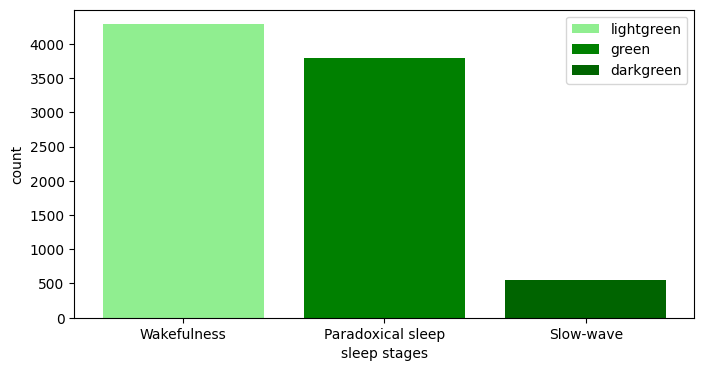

In [5]:
df1 = labeled_df["5000"].value_counts().reset_index().rename(columns={"5000":"stage"})
fig, ax = plt.subplots(figsize=(8,4))

bar_labels = ['lightgreen', 'green', 'darkgreen']
bar_colors = ['lightgreen', 'green', 'darkgreen']

ax.bar(x = labels, height = df1["count"],  label=bar_labels, color=bar_colors)
ax.set_ylabel('count')
ax.set_xlabel('sleep stages')
ax.legend(bar_labels)
plt.show()

# Feature Engineering

In [6]:
y =  labeled_df.iloc[:,-1]
sample_index =labeled_df.index
labeled_df = np.array(labeled_df.iloc[:,:-1]) # Replace with your sleep EEG data

#### butter_bandpass_filter doesn't work

In [7]:
# import numpy as np
# from scipy.signal import butter, lfilter

# def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
#     nyq = 0.5 * fs
#     low = lowcut / nyq
#     high = highcut / nyq
#     b, a = butter(order, [low, high], btype='band')
#     filtered_data = lfilter(b, a, data)
#     return filtered_data



# def delta_power(data):
#     # Example usage:
#     fs = 500  # Sampling rate (adjust as needed)

#     # Define sleep stage frequency bands
#     delta_low, delta_high = 0.5, 4
      
#     # Apply the filter to each row of the NumPy array
#     delta_filtered = np.apply_along_axis(lambda x: butter_bandpass_filter(x, delta_low, delta_high, fs), axis=1, arr=labeled_df)
    
#     return np.mean(delta_filtered ** 2, axis=1)
    

# def theta_power(data):
#     fs = 500  # Sampling rate (adjust as needed)
#     theta_low, theta_high = 4, 8
#     theta_filtered = np.apply_along_axis(lambda x: butter_bandpass_filter(x, theta_low, theta_high, fs=fs) , axis=1, arr=labeled_df)
#     return  np.mean(theta_filtered ** 2, axis=1)

# def alpha_power(data):
#     fs = 500  # Sampling rate (adjust as needed)
#     alpha_low, alpha_high = 8, 12
#     alpha_filtered = np.apply_along_axis(lambda x: butter_bandpass_filter(x, alpha_low, alpha_high, fs=fs), axis=1, arr=labeled_df)
#     return np.mean(alpha_filtered ** 2, axis=1)



#### statistics features

In [8]:
def mean(x):
    return np.mean(x, axis=1)
def std(x):
    return np.std(x, axis=1)
def ptp(x):
    return np.ptp(x, axis=1)
def var(x):
    return np.var(x, axis=1)
def minim(x):
    return np.min(x, axis=1)
def maxim(x):
    return np.max(x, axis=1)
def argminim(x):
    return np.argmin(x, axis=1)
def argmaxim(x):
    return np.argmax(x, axis=1)
def rms(x):
    return np.sqrt(np.mean(x**2, axis=1))
def abs_diff_signal(x):
    return np.sum(np.abs(np.diff(x, axis =1)), axis =1)
def skewness(x):
    return scipy.stats.skew(x, axis=1)
def kurtosis(x):
    return scipy.stats.kurtosis(x, axis=1)
def concate_feature(x):
    return np.array([mean(x), std(x), ptp(x), var(x), minim(x), maxim(x), argminim(x), 
                           argmaxim(x), rms(x), abs_diff_signal(x), skewness(x), kurtosis(x), 
                        #    delta_power(x), theta_power(x), alpha_power(x)
                           ]).T

In [9]:
X = concate_feature(labeled_df)

In [10]:

columns = ['mean', 'std', 'ptp', 'var', 'minim', 'maxim', 'argminim', 'argmaxim', 'rms', 'abs_diff_signal', 'skewness', 'kurtosis', 
        #    'delta_power','theta_power','alpha_power',
           'sleep_stage']
df = pd.DataFrame(np.column_stack([X, y]), columns= columns)



# data preprocessing

In [ ]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm

path = "bdhsc_2024\stage1_labeled"

# Get a list of CSV files in the directory
csv_files = [file_name for file_name in os.listdir(path) if file_name.endswith('.csv')]

# Create a progress bar
pbar = tqdm(total=len(csv_files), desc="Processing files")

dfs = []

for file_name in csv_files:
    # Extract animal_id and recording_id from the file name
    animal_id, recording_id = file_name.split('_')
    animal_id = int(animal_id)
    recording_id = int(recording_id.split('.')[0])
    
    # Read the CSV file
    labeled_df = pd.read_csv(os.path.join(path, file_name))
    y =  labeled_df.iloc[:,-1]
    sample_index =labeled_df.index
    labeled_df = np.array(labeled_df.iloc[:,:-1]) # Replace with your sleep EEG data
    X = concate_feature(labeled_df)
    
    columns = ['mean', 'std', 'ptp', 'var', 'minim', 'maxim', 'argminim', 'argmaxim', 'rms', 'abs_diff_signal', 'skewness', 'kurtosis', 
                # 'delta_power','theta_power','alpha_power',
                'sleep_stage']
    df = pd.DataFrame(np.column_stack([X, y]), columns= columns)
    
    # Add columns for animal_id and recording_id
    df['animal_id'] = animal_id
    df['recording_id'] = recording_id
    df['sample_index']= sample_index
    
    # Append the DataFrame to the list
    dfs.append(df)
    
    # Update the progress bar
    pbar.update(1)

# Close the progress bar
pbar.close()

In [12]:
# pd.concat(dfs).to_csv("labeled_preprocess_v1.csv",  index=False)
df = pd.read_csv("labeled_preprocess_v1.csv")
df.head(1)

,mean,std,ptp,var,minim,maxim,argminim,argmaxim,rms,abs_diff_signal,skewness,kurtosis,sleep_stage,animal_id,recording_id,sample_index
0,-0.000004,0.000037,0.000273,1.362196e-09,-0.000157,0.000117,2284.0,2868.0,0.000037,0.054408,0.02167,-0.113542,2.0,0,0,0


In [6]:
# correlation matrix
plt.figure(figsize=(12,5))
sns.heatmap(df.iloc[:,:-1].corr(), annot=True)
plt.show()

In [13]:
df.columns

Index(['mean', 'std', 'ptp', 'var', 'minim', 'maxim', 'argminim', 'argmaxim', 'rms', 'abs_diff_signal', 'skewness', 'kurtosis', 'sleep_stage', 'animal_id', 'recording_id',
       'sample_index'],
      dtype='object')

## Features Importance

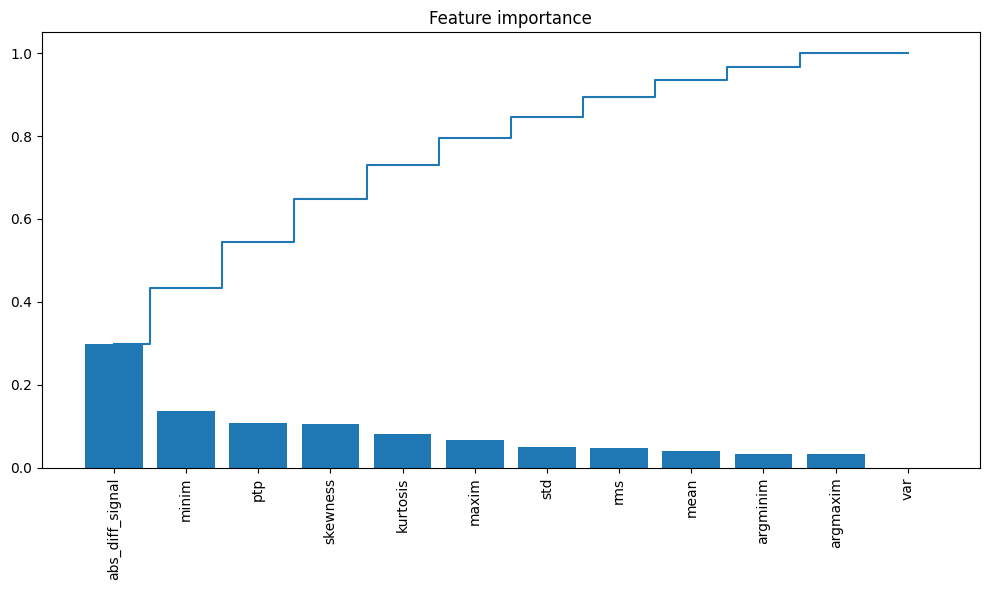

In [14]:
# module for the random forest
from sklearn.ensemble import RandomForestClassifier

y = df['sleep_stage'].astype(int)
identifier = df.iloc[:,-3:]
identifier

X = df.iloc[:,:-4]


# instantiate the model
rf = RandomForestClassifier(n_estimators=20, random_state=1, n_jobs=2)
rf.fit(pd.get_dummies(df.drop(['sleep_stage', 'animal_id', 'recording_id', 'sample_index'], axis=1), drop_first= True, dtype='int'),
       df.sleep_stage.astype(int))

importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]
feat_labels = pd.get_dummies(df.drop(['sleep_stage', 'animal_id', 'recording_id', 'sample_index'],axis =1), drop_first=True).columns[:]
# print feature important using text in descending order
# for f in range(X.shape[1]):
#     print("%2d) %-*s %f" % (f + 1, 40, 
#                             feat_labels[indices[f]], 
#                             importances[indices[f]]))


# plot bar graph of the feature importance
plt.figure(figsize=(10,6))
plt.title('Feature importance')
plt.bar(range(X.shape[1]), 
        importances[indices],
        align='center')
plt.step(range(0, X.shape[1]), np.cumsum(importances[indices]), where='mid')

plt.xticks(range(X.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [15]:
importances[indices]

array([2.97932224e-01, 1.36677410e-01, 1.08882145e-01, 1.05212709e-01,
       8.07468993e-02, 6.59721396e-02, 5.04450081e-02, 4.72676362e-02,
       4.16256613e-02, 3.26929146e-02, 3.25329042e-02, 1.23488809e-05])

# Machine learning

In [16]:
# del labeled
y = df['sleep_stage'].astype(int)
identifier = df.iloc[:,-3:]
identifier

X = df.iloc[:,:-4]

### oversmaple

In [12]:
from imblearn.over_sampling import SMOTE

#splits
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10, stratify = y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, stratify = y_train, random_state=42)

# Oversample training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


#smote
from collections import Counter
from imblearn.over_sampling import SMOTE
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({2: 57431, 1: 48429, 0: 6114})
Resampled dataset shape Counter({1: 57431, 0: 57431, 2: 57431})


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.decomposition import PCA # module for principal component analysis


# Define the machine learning pipeline
pipelines = {
    "Decision Tree": Pipeline([
        ("clf", DecisionTreeClassifier(random_state=42))
    ]),
    "Logistic Regression pca": Pipeline([
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=0.95)),
        ("clf", LogisticRegression(max_iter=1000, random_state=42))
    ]),
        "Logistic Regression std": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, random_state=42))
    ]),
    "K-Nearest Neighbors": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier(n_neighbors= 3))
    ]),
        "Random Forest": Pipeline([
        # ("scaler", StandardScaler()),
        ("clf", RandomForestClassifier())
    ]),
            "XGBoost": Pipeline([
        # ("scaler", StandardScaler()),
        ("clf", xgb.XGBClassifier())
    ])
}

# Train and evaluate each pipeline
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print()

Classifier: Decision Tree
Accuracy: 0.815
Confusion Matrix:
[[ 233   55  467]
 [  51 5227  701]
 [ 573  704 5813]]

Classifier: Logistic Regression pca
Accuracy: 0.846
Confusion Matrix:
[[   0   18  737]
 [   0 5303  676]
 [  13  678 6399]]

Classifier: Logistic Regression std
Accuracy: 0.847
Confusion Matrix:
[[   0   19  736]
 [   0 5286  693]
 [   0  664 6426]]

Classifier: K-Nearest Neighbors
Accuracy: 0.841
Confusion Matrix:
[[ 128   30  597]
 [  59 5462  458]
 [ 355  704 6031]]

Classifier: Random Forest
Accuracy: 0.880
Confusion Matrix:
[[  96   25  634]
 [   4 5505  470]
 [  56  469 6565]]

Classifier: XGBoost
Accuracy: 0.881
Confusion Matrix:
[[ 112   29  614]
 [   5 5540  434]
 [  69  489 6532]]



### with pca

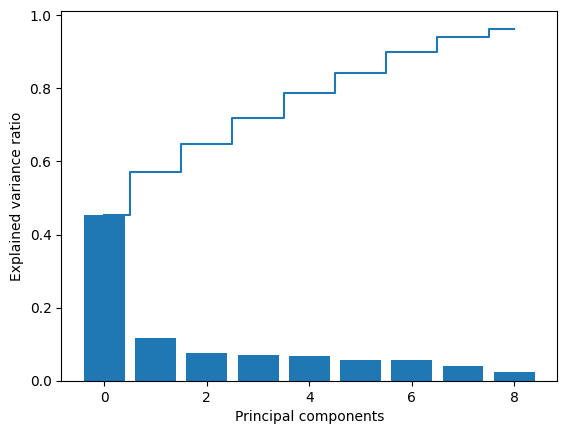

In [172]:
# apply pca to the standardize train and test set
pca = PCA(n_components = 0.95) 
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

pca.explained_variance_ratio_
plt.bar(range(X_train_pca.shape[1]), pca.explained_variance_ratio_, align='center')
plt.step(range(X_train_pca.shape[1]), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [111]:
np.cumsum(pca.explained_variance_ratio_)

array([0.45373139, 0.5705573 , 0.6477184 , 0.71801786, 0.78627426,
       0.84290563, 0.89904503, 0.93989874, 0.96340138])

## without smote

In [174]:
# Train and evaluate each pipeline
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print()

Classifier: Decision Tree
Accuracy: 0.814
Confusion Matrix:
[[  432    90   988]
 [   97 10424  1437]
 [ 1084  1457 11639]]

Classifier: Logistic Regression pca
Accuracy: 0.845
Confusion Matrix:
[[    0    36  1474]
 [    0 10584  1374]
 [    0  1402 12778]]

Classifier: Logistic Regression std
Accuracy: 0.846
Confusion Matrix:
[[    0    39  1471]
 [    0 10561  1397]
 [    0  1341 12839]]



# Cross validation nested

In [258]:
#logistics regression pipeline search
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# random forest pipeline search
pipe_rf = make_pipeline(RandomForestClassifier(random_state=1))
# param_range_rf  = [20, 50
#                    ]

param_grid_rf  = [{'randomforestclassifier__max_depth': [7],
                   'randomforestclassifier__criterion': [
                    #    'gini','entropy',
                                                         'log_loss'
                                                         ],
                   'randomforestclassifier__n_estimators': [
                    #    50,
                                                            100],
                   'randomforestclassifier__max_features': [7],
                   }]

# performing 10 fold cross validation using lr model
gs = GridSearchCV(estimator=pipe_rf, 
                  param_grid=param_grid_rf, 
                  scoring='accuracy', 
                  refit=True,
                  cv=2,
                  n_jobs=-1, 
                  verbose=2)
gs = gs.fit(X_train, y_train)
y_preds = gs.predict(X_val)
gs.best_params_

Fitting 2 folds for each of 1 candidates, totalling 2 fits


{'randomforestclassifier__criterion': 'log_loss',
 'randomforestclassifier__max_depth': 7,
 'randomforestclassifier__max_features': 7,
 'randomforestclassifier__n_estimators': 100}

In [259]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
CV accuracy: 0.857 +/- 0.002


In [260]:
print(f"Accuracy: {accuracy_score(y_val, y_preds):.3f}")

Accuracy: 0.858


# Debugging algorithms with learning curves

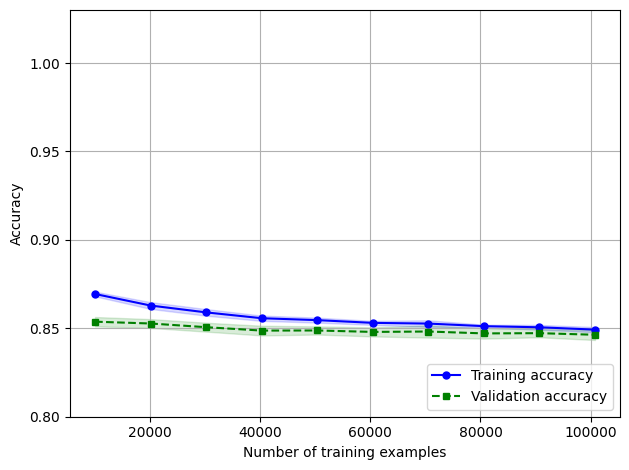

In [248]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

#logistics regression pipeline search
# pipe_lr = make_pipeline(StandardScaler(),
#                         LogisticRegression(penalty='l2', max_iter=100))


# pipe_knn = make_pipeline(StandardScaler(),
#                          PCA(n_components=0.95),
#                         KNeighborsClassifier())

# pipe_dt = make_pipeline(DecisionTreeClassifier(criterion="log_loss", max_depth=20))

pipe_rf = make_pipeline(RandomForestClassifier(criterion="log_loss", max_depth =7, 
                                               n_estimators= 100,
                                            #    max_features=7, 
                                            #    min_samples_split= ,
                                               ))


train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_rf,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
# plt.savefig('figures/06_05.png', dpi=300)
plt.show()

# Addressing over- and underfitting with validation curves

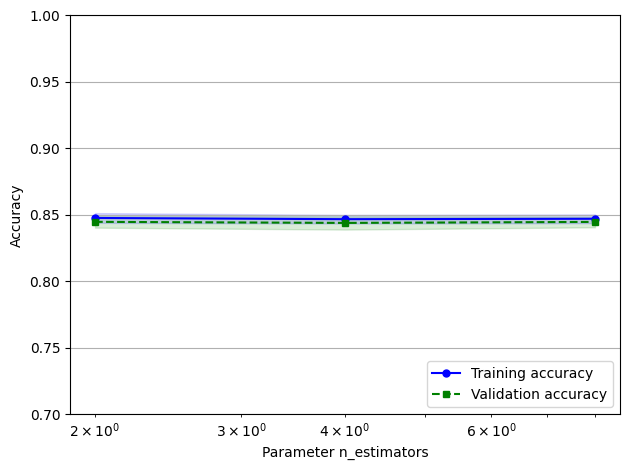

In [246]:
from sklearn.model_selection import validation_curve

param_range = [2, 4, 8]
train_scores, test_scores = validation_curve(
                estimator=pipe_rf, 
                X=X_train, 
                y=y_train, 
                param_name='randomforestclassifier__min_samples_leaf', 
                param_range=param_range,
                cv=10,
                n_jobs=-1
                )

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter n_estimators')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.0])
plt.tight_layout()
# plt.savefig('figures/06_06.png', dpi=300)
plt.show()

In [261]:
y_preds_test = gs.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_preds_test):.3f}")

Accuracy: 0.860
